In [1]:
import tensorflow as tf
from keras.models import load_model
from keras import Input, Model
from keras.layers import Conv2D, Conv1D, Dropout, BatchNormalization, LeakyReLU, ReLU, Conv1DTranspose, Conv2DTranspose, Activation, Concatenate, Multiply,UpSampling2D,MaxPooling2D,Flatten,Dense
import numpy as np
from keras import Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
from keras.models import load_model
import keras
import librosa
from librosa.util import find_files
from librosa import load

In [2]:
# !pip install -U segmentation-models

# !pip install q tensorflow==2.1
# !pip install q keras==2.4.3
# !pip install tensorflow-estimator==2.1

In [3]:
SR =  44100
window_size = 1024
hop_length = 690

patch_size = 128

## for training
EPOCH = 1
BATCH = 16
SAMPLING_STRIDE = 10

In [4]:
SPECTROGRAM_PATH = 'F:\BEX IV I\python\DSD100\save song\save song 0'

In [6]:
#load npz file to variable upto 4000 data due to lack of Memory
def LoadSpectrogram(file_path):
  file_folder = os.listdir(file_path)
  length = len(file_folder)
  x_list = []
  y_list = []
  x=0
  for x in range(4000) :
#     if(x<4000):
#       continue
    file = file_path +'\\'+ file_folder[x]
    data = np.load(file)
    x_list.append(data['mixture'])
    y_list.append(data['vocal'])
    data = []
  return x_list, y_list

In [ ]:
X_list, Y_list = LoadSpectrogram(SPECTROGRAM_PATH)

In [9]:
def unet(inputs=Input((512, 128, 1))):
  size = 5
  #print(inputs.shape)
  # print("1 conv")
  conv1 = Conv2D(16, size, strides=2, padding='same')(inputs)
  # print(conv1.shape)
  conv1 = BatchNormalization(axis=-1)(conv1)
  # print(conv1.shape)
  conv1 = Dropout(0.5)(conv1)
  # print(conv1.shape)
  # conv1 = LeakyReLU(alpha=0.2)(conv1)
  conv1 = tf.keras.activations.relu(conv1,alpha = 0.2)
  # print(conv1.shape)

  # print("2 conv")
  conv2 = Conv2D(32, size, strides=2, padding='same')(conv1)
  # print(conv2.shape)
  conv2 = BatchNormalization(axis=-1)(conv2)
  # print(conv2.shape)
  conv2 = Dropout(0.5)(conv2)
  # print(conv2.shape)
  #conv2 = LeakyReLU(alpha=0.2)(conv2)
  conv2 = tf.keras.activations.relu(conv2,alpha=0.2)
  # print(conv2.shape)

  # print("3 conv")
  conv3 = Conv2D(64, size, strides=2, padding='same')(conv2)
  # print(conv3.shape)
  conv3 = BatchNormalization(axis=-1)(conv3)
  # print(conv3.shape)
  conv3 = Dropout(0.5)(conv3)
  # print(conv3.shape)
  #conv3 = LeakyReLU(alpha=0.2)(conv3)
  conv3 = tf.keras.activations.relu(conv3,alpha=0.2)
  # print(conv3.shape)

  # print("4 conv")
  conv4 = Conv2D(128, size, strides=2, padding='same')(conv3)
  # print(conv4.shape)
  conv4 = BatchNormalization(axis=-1)(conv4)
  # print(conv4.shape)
  #conv4 = LeakyReLU(alpha=0.2)(conv4)
  conv4 = tf.keras.activations.relu(conv4,alpha=0.2)
  # print(conv4.shape)

  # print("5 conv")
  conv5 = Conv2D(256, size, strides=2, padding='same')(conv4)
  # print(conv5.shape)
  conv5 = BatchNormalization(axis=-1)(conv5)
  # print(conv5.shape)
  #conv5 = LeakyReLU(alpha=0.2)(conv5)
  conv5 = tf.keras.activations.relu(conv5,alpha=0.2)
  # print(conv5.shape)

  # print("6 conv")
  conv6 = Conv2D(512, size, strides=2, padding='same')(conv5)
  # print(conv6.shape)
  conv6 = BatchNormalization(axis=-1)(conv6)
  # print(conv6.shape)
  # conv6 = LeakyReLU(alpha=0.2)(conv6)
  conv6 = tf.keras.activations.relu(conv6,alpha=0.2)
  # print(conv6.shape)

  # print("7 deconv")
  deconv7 = Conv2DTranspose(256, size, strides=2, padding='same')(conv6)
  # print(deconv7.shape)
  deconv7 = BatchNormalization(axis=-1)(deconv7)
  # print(deconv7.shape)
  deconv7 = Dropout(0.5)(deconv7)
  # print(deconv7.shape)
  deconv7 = tf.keras.activations.relu(deconv7,alpha=0.2)
  # print(deconv7.shape)

  # print("8 deconv")
  deconv8 = Concatenate(axis=-1)([deconv7, conv5])
  # print(deconv8.shape)
  deconv8 = Conv2DTranspose(128, size, strides=2, padding='same')(deconv8)
  # print(deconv8.shape)
  deconv8 = BatchNormalization(axis=-1)(deconv8)
  # print(deconv8.shape)
  deconv8 = Dropout(0.5)(deconv8)
  # print(deconv8.shape)
  deconv8 = tf.keras.activations.relu(deconv8,alpha=0.2)
  # print(deconv8.shape)

  # print("9 deconv")
  deconv9 = Concatenate(axis=-1)([deconv8, conv4])
  # print(deconv9.shape)
  deconv9 = Conv2DTranspose(64, size, strides=2, padding='same')(deconv9)
  # print(deconv9.shape)
  deconv9 = BatchNormalization(axis=-1)(deconv9)
  # print(deconv9.shape)
  deconv9 = Dropout(0.5)(deconv9)
  # print(deconv9.shape)
  deconv9 = tf.keras.activations.relu(deconv9,alpha=0.2)
  # print(deconv9.shape)

  # print("10 deconv")
  deconv10 = Concatenate(axis=-1)([deconv9, conv3])
  # print(deconv10.shape)
  deconv10 = Conv2DTranspose(32, size, strides=2, padding='same')(deconv10)
  # print(deconv10.shape)
  deconv10 = BatchNormalization(axis=-1)(deconv10)
  # print(deconv10.shape)
  deconv10 = tf.keras.activations.relu(deconv10,alpha=0.2)
  # print(deconv10.shape)

  # print("11 deconv")
  deconv11 = Concatenate(axis=-1)([deconv10, conv2])
  # print(deconv11.shape)
  deconv11 = Conv2DTranspose(16, size, strides=2, padding='same')(deconv11)
  # print(deconv11.shape)
  deconv11 = BatchNormalization(axis=-1)(deconv11)
  # print(deconv11.shape)
  deconv11 = tf.keras.activations.relu(deconv11,alpha=0.2)
  # print(deconv11.shape)

  # print("12 deconv")
  deconv12 = Concatenate(axis=-1)([deconv11, conv1])
  # print(deconv12.shape)
  deconv12 = Conv2DTranspose(1, size, strides=2, padding='same')(deconv12)
  # print(deconv12.shape)
  deconv12 = BatchNormalization(axis=-1)(deconv12)
  # print(deconv12.shape)
  deconv12 = tf.keras.activations.sigmoid(deconv12)
  # print(deconv12.shape)

  output = Multiply()([deconv12, inputs])
  # output = deconv12
  # print("output")
  #print(output.shape)
  return Model(inputs=inputs, outputs=output)


if __name__ == '__main__':
    inputs = Input((512, 128, 1))
    model = unet(inputs)

In [10]:
#path of model to create if not find or load 
MODEL_PATH = "F:\BEX IV I\python\DSD100\model\vocal.h5"

In [11]:
#load or create model file
if os.path.isfile(MODEL_PATH) is True:
    #load the model
    model = load_model(MODEL_PATH)
    print('model loaded successfully')  
else:
    model = unet()
    model.compile(optimizer=Adam(1e-2), loss='mse', metrics=['accuracy'])
    print('model created successfully')

model created successfully


In [1]:
#sampling data to size (512, 128,1) for input to model
def sampling(X_mag,Y_mag) :
    X_list = []
    Y_list = []
    for mix, target in zip(X_mag,Y_mag) :
        starts = 0
#         starts = np.random.randint(0, mix.shape[1] - patch_size, (mix.shape[1] - patch_size) // SAMPLING_STRIDE)
#         for start in starts:
        end = starts + patch_size
        X_list.append(mix[1:, starts:end, np.newaxis])
        Y_list.append(target[1:, starts:end, np.newaxis])
    return np.asarray(X_list, dtype=np.float32), np.asarray(Y_list, dtype=np.float32)

In [ ]:
X_list,Y_list = sampling(X_list,Y_list)

In [ ]:
#fit model
history = model.fit(X_list, Y_list, batch_size=BATCH, epochs=100, validation_split=0.3, shuffle=True, use_multiprocessing=True)#, steps_per_epoch=150)

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


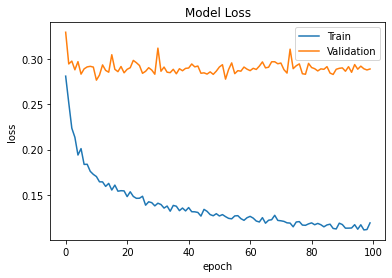

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')#epoch = 10 ma low validation loss xa
plt.show()

In [ ]:
#save model
model.save(MODEL_PATH, overwrite=True)
print('model saved successfully')